# Let's Grow More Data Science Virtual Internship Program june 2023

# LGMVIP june 2023

## BY: Remoon zean j

### INTERMEDIATE LEVEL TASK

## TASK 5: Exploratory Data Analysis on Dataset - Terrorism
As a security/defense analyst, trying to find out the hot zone of terrorism.

### Exploratory Data Analysis(EDA)
Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### Dataset Link: https://bit.ly/2TK5Xn5

### Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
# Read the CSV file
dataset=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
dataset.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9.0,-9.0,0.0,-9.0,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,NaN


In [5]:
dataset.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
23520,198410170007,1984,10,17,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,"198410170003, 198410170004, 198410170005, 1984..."
1695,197301040001,1973,1,4,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,CAIN,0.0,0.0,1.0,1.0,NaN
24188,198501150001,1985,1,15,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
15922,198204090002,1982,4,9,NaN,0,NaN,155,West Bank and Gaza Strip,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
9981,198001130002,1980,1,13,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
13032,198103050004,1981,3,5,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
10817,198004250001,1980,4,25,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
6889,197810200001,1978,10,20,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
21990,198405110001,1984,5,11,NaN,0,NaN,43,Chile,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
403,197007090001,1970,7,9,NaN,0,NaN,362,West Germany (FRG),8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
dataset.shape

(25487, 135)

In [7]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25487 entries, 0 to 25486
Columns: 135 entries, eventid to related
dtypes: float64(60), int64(18), object(57)
memory usage: 26.3+ MB


In [9]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.548700e+04,25487.000000,25487.000000,25487.000000,25487.000000,25487.000000,25487.000000,24225.000000,2.422500e+04,25487.000000,...,4.760000e+02,1.0,9.900000e+01,1.0,788.000000,603.000000,25486.000000,25486.000000,25486.000000,25486.00000
mean,1.979993e+11,1979.929062,6.223526,15.107859,0.017381,165.555813,5.193432,21.965189,-3.590815e+03,1.368345,...,3.600390e+06,20000.0,1.232805e+06,0.0,2.931472,11.064677,-3.359845,-3.312956,0.210782,-2.46551
std,3.794164e+08,3.796787,3.398103,8.910831,0.130690,156.228074,3.274959,24.735465,5.537378e+05,1.053128,...,4.623669e+07,NaN,4.590031e+06,NaN,1.349055,37.064335,4.451781,4.502217,0.690747,4.40856
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.00000
25%,1.978052e+11,1978.000000,3.000000,7.000000,0.000000,61.000000,2.000000,10.984639,-8.587080e+01,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.00000
50%,1.981013e+11,1981.000000,6.000000,15.000000,0.000000,110.000000,3.000000,24.469722,-5.844443e+01,1.000000,...,0.000000e+00,20000.0,5.300000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,1.983062e+11,1983.000000,9.000000,23.000000,0.000000,185.000000,8.000000,41.890961,8.742907e+00,1.000000,...,4.402500e+05,20000.0,6.605000e+05,0.0,4.000000,3.000000,0.000000,0.000000,0.000000,1.00000
max,1.985062e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,1.747763e+02,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,390.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
dataset.isnull().sum()

eventid           0
iyear             0
imonth            0
iday              0
approxdate    25466
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       24016
Length: 135, dtype: int64

In [11]:
#Rename the necessary columns

dataset.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
dataset['Casualities'] = dataset.Killed + dataset.Wounded
dataset=dataset[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
dataset.head(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,0.0,Cairo Police Headquarters,Black Nationalists,Police,Firearms
6,1970,1,2,Uruguay,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),Police,Firearms
7,1970,1,2,United States,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,0.0,Edes Substation,Unknown,Utilities,Explosives
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,Military,Incendiary
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,0.0,Selective Service Headquarters in Madison Wisc...,New Year's Gang,Government (General),Incendiary


In [12]:
dataset.sample(10)

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
13632,1981,5,29,United States,North America,Toledo,44.622266,-123.937354,Facility/Infrastructure Attack,0.0,0.0,0.0,1977 Hiller 12-E helicopter owned by Western H...,People's Brigade For A Healthy Genetic Future,Airports & Aircraft,Incendiary
3274,1975,9,25,Switzerland,Western Europe,Geneva,46.198392,6.142296,Bombing/Explosion,0.0,0.0,0.0,Spanish Consulate,International Revolutionary Action Group (GARI),Government (Diplomatic),Explosives
14183,1981,8,20,El Salvador,Central America & Caribbean,Perquin,13.949826,-88.146348,Armed Assault,NaN,NaN,NaN,Military Unit,Farabundo Marti National Liberation Front (FMLN),Military,Firearms
4234,1976,10,21,Italy,Western Europe,Milan,45.469212,9.174508,Bombing/Explosion,0.0,0.0,0.0,"car, near newspaper office",Unknown,Journalists & Media,Explosives
1591,1972,10,13,France,Western Europe,Paris,48.856644,2.342330,Bombing/Explosion,0.0,0.0,0.0,El al office at airport,Unknown,Airports & Aircraft,Explosives
7444,1979,1,25,Nicaragua,Central America & Caribbean,Jinotepe,11.849620,-86.199030,Bombing/Explosion,0.0,0.0,0.0,town,Unknown,Private Citizens & Property,Explosives
13119,1981,3,18,Spain,Western Europe,Bilbao,43.258434,-2.921819,Assassination,0.0,1.0,1.0,"Ramon Romeo Rotaeche, Lt. Colonel",Basque Fatherland and Freedom (ETA),Military,Firearms
12648,1981,1,11,El Salvador,Central America & Caribbean,Chalatenango,14.041110,-88.938568,Armed Assault,NaN,NaN,NaN,Town of Chalatenango,Unknown,Private Citizens & Property,Firearms
23756,1984,11,14,Peru,South America,Lima,-11.967368,-76.978462,Bombing/Explosion,NaN,NaN,NaN,Electrical High Tension Line Tower,Shining Path (SL),Utilities,Explosives
1824,1973,4,5,Argentina,South America,Cordoba,-31.399301,-64.182129,Assassination,1.0,0.0,1.0,"Hector Irizarren, Chief of Intelligence, 3rd Army",Montoneros (Argentina),Military,Firearms


In [13]:
dataset.shape

(25487, 16)

In [14]:
dataset.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [15]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25487 entries, 0 to 25486
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25487 non-null  int64  
 1   Month        25487 non-null  int64  
 2   Day          25487 non-null  int64  
 3   Country      25487 non-null  object 
 4   Region       25487 non-null  object 
 5   City         25487 non-null  object 
 6   latitude     24225 non-null  float64
 7   longitude    24225 non-null  float64
 8   AttackType   25487 non-null  object 
 9   Killed       20519 non-null  float64
 10  Wounded      18846 non-null  float64
 11  Casualities  18718 non-null  float64
 12  Target       25191 non-null  object 
 13  Group        25486 non-null  object 
 14  Target_type  25487 non-null  object 
 15  Weapon_type  25486 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 3.1+ MB


In [16]:
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,25487.000000,25487.000000,25487.000000,24225.000000,2.422500e+04,20519.000000,18846.000000,18718.000000
mean,1979.929062,6.223526,15.107859,21.965189,-3.590815e+03,2.176227,1.594821,3.638316
std,3.796787,3.398103,8.910831,24.735465,5.537378e+05,9.474358,11.708537,16.382537
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1978.000000,3.000000,7.000000,10.984639,-8.587080e+01,0.000000,0.000000,0.000000
50%,1981.000000,6.000000,15.000000,24.469722,-5.844443e+01,0.000000,0.000000,0.000000
75%,1983.000000,9.000000,23.000000,41.890961,8.742907e+00,1.000000,0.000000,2.000000
max,1986.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,751.000000,760.000000


### Cheking the missing data

In [17]:
dataset.isnull().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
City              0
latitude       1262
longitude      1262
AttackType        0
Killed         4968
Wounded        6641
Casualities    6769
Target          296
Group             1
Target_type       0
Weapon_type       1
dtype: int64

In [18]:
#Removing the Missing data:
dataset.dropna(axis=0, inplace=True)
dataset.shape

(17603, 16)

In [19]:
#Re-Checking for Missing Data:
dataset.isnull().sum()

Year           0
Month          0
Day            0
Country        0
Region         0
City           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Casualities    0
Target         0
Group          0
Target_type    0
Weapon_type    0
dtype: int64

### Data Visualization

## Yearly count of Terrorist Attack

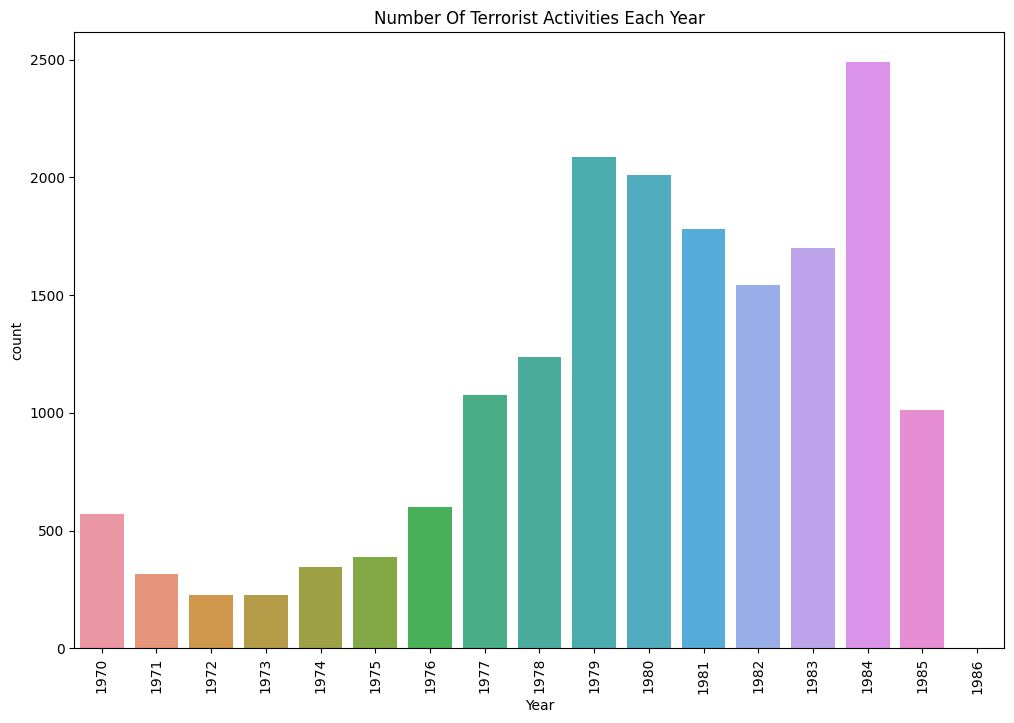

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="Year", data=dataset)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

## Observations obtained are:
From the graph we can see 2013-17 marks the highest attacks with 2014 having the highest.

There has been a gradual increase in Terror Activities since 2004.

Highest number of terror activities occurred in the year 2014.

After 2014 the terror activities started to decrease.

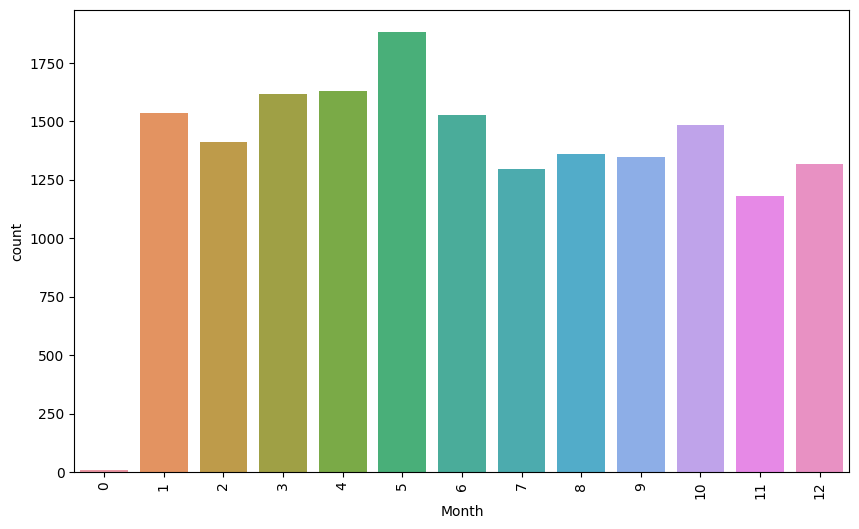

In [21]:
#month analysis
dataset['Month'].value_counts()
plt.figure(figsize = (10, 6))
sns.countplot(x='Month', data = dataset)
plt.xticks(rotation=90)
plt.show()

## Terrorist Activities By Region In Each Year

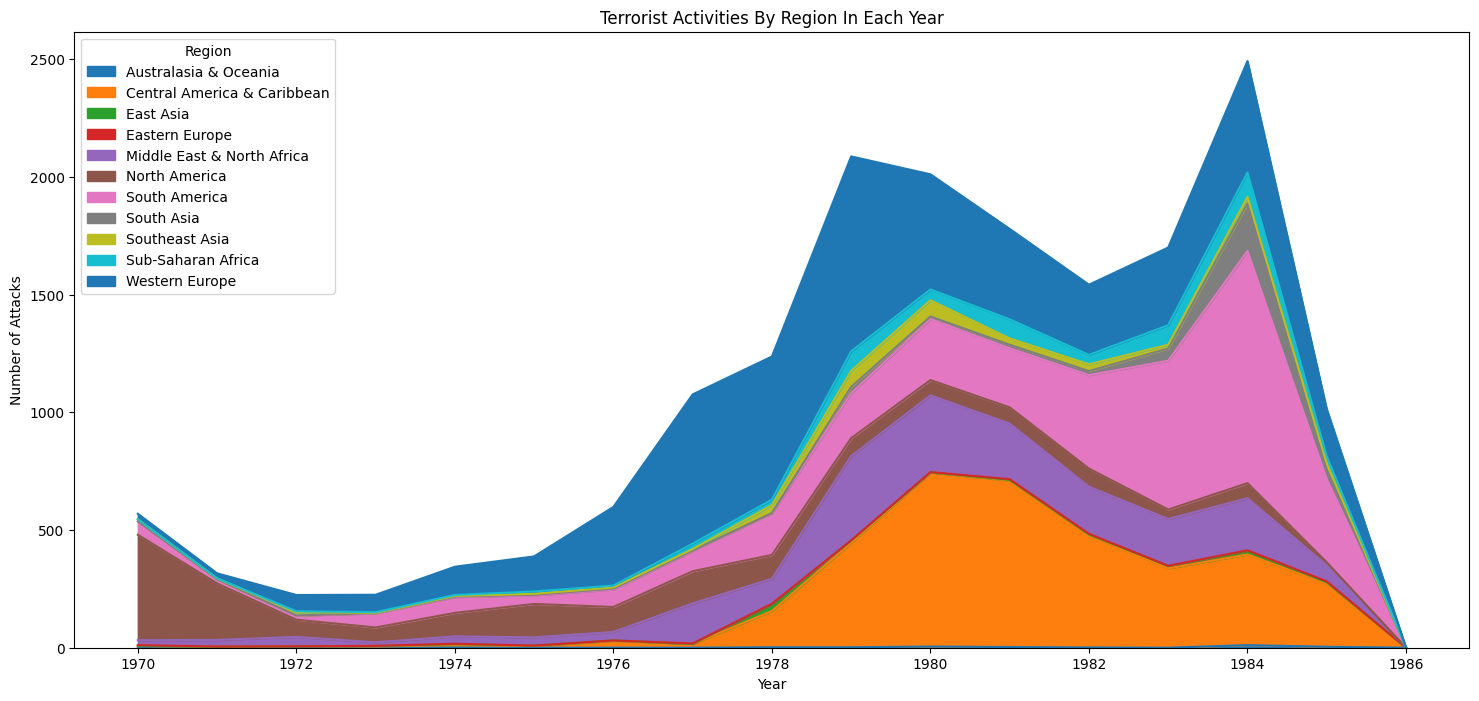

In [22]:
#Terrorist Activities By Region In Each Year
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(18,8))
plt.title('Terrorist Activities By Region In Each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [23]:
dataset['Wounded'] = dataset['Wounded'].fillna(0).astype(int)
dataset['Killed'] = dataset['Killed'].fillna(0).astype(int)
dataset['casualities'] = dataset['Killed'] + dataset['Wounded']

In [24]:
terror1 = dataset.sort_values(by='casualities',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head(10)

Year,1972,1973,1975,1976,1978,1980,1981,1982,1983,1984,1985
Country,,,,,,,,,,,
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,396.00,130.0,0.000000
El Salvador,0.0,0.0,0.0,0.0,0.0,220.0,0.0,0.0,180.00,0.0,0.000000
Ethiopia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,400.0,0.000000
Guatemala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.0,0.00,0.0,0.000000
Iran,0.0,0.0,0.0,0.0,422.0,0.0,0.0,760.0,0.00,318.0,0.000000
Iraq,0.0,0.0,0.0,295.0,0.0,0.0,0.0,158.0,0.00,0.0,0.000000
Italy,0.0,0.0,0.0,0.0,0.0,273.0,0.0,0.0,0.00,127.0,0.000000
Kenya,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
Lebanon,0.0,0.0,0.0,0.0,258.0,0.0,274.5,0.0,206.25,0.0,253.333333


In [25]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#A52A2A'],  [.6,'#76EE00'],  [1, '#008B8B']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

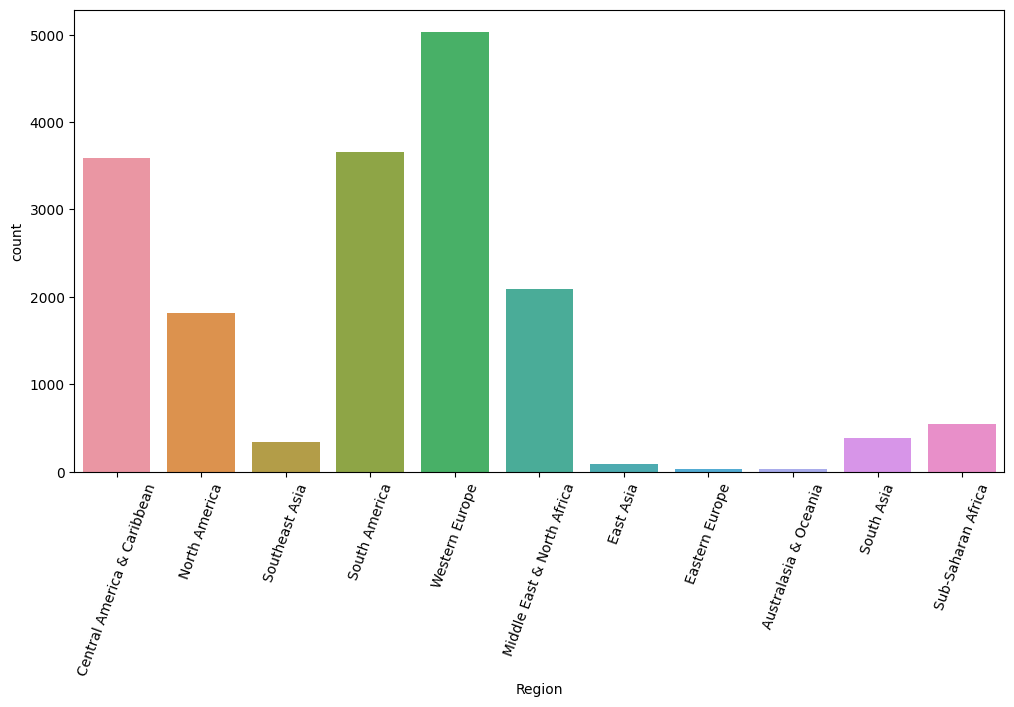

In [26]:
#REGION AFFECTED BY TERRORIST ATTACK
dataset['Region'].value_counts()
plt.figure(figsize=(12,6
                   ))
sns.countplot(x='Region',data=dataset)
plt.xticks(rotation=70)
plt.show()

In [27]:
#Counting the Yearly Casualities-
year_cas = dataset.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
px.bar(data_frame=year_cas,x = 'Year',y = 'Casualities',color='Casualities',template='plotly_dark')


In [28]:
#Observation
#It is observed that 2015 marks the highest Casualities records.

#Type of Target Attacks
target = list(dataset['Target_type'])
target_map = dict(Counter(target))
target_df = pd.DataFrame(target_map.items())
target_df.columns = ['Target Type','Count']
px.bar(data_frame=target_df,x = 'Target Type',y = 'Count',color='Target Type',template='plotly_white')


In [29]:
# Observation
# Private Citizens and Property Counts the highest amongst all.

# Analysing the Type of Attacks:-
#Counting the Casuallities according the Attack Type
AttackType=dataset.pivot_table(columns='AttackType',values='Casualities',aggfunc='sum')
AttackType = AttackType.T
AttackType['Type'] = AttackType.index

In [30]:
#plotting the Attack Type
labels = AttackType.columns.tolist()
attack=AttackType.T
values=attack.values.tolist()
values = sum(values,[])
attack_type = list(dataset['AttackType'].unique())
fig = go.Figure(data=[go.Pie(labels = attack_type,values=values,hole=.3)])
fig.update_layout(template = 'gridon')
fig.show()

Text(0.5, 1.0, 'Favorite Targets')

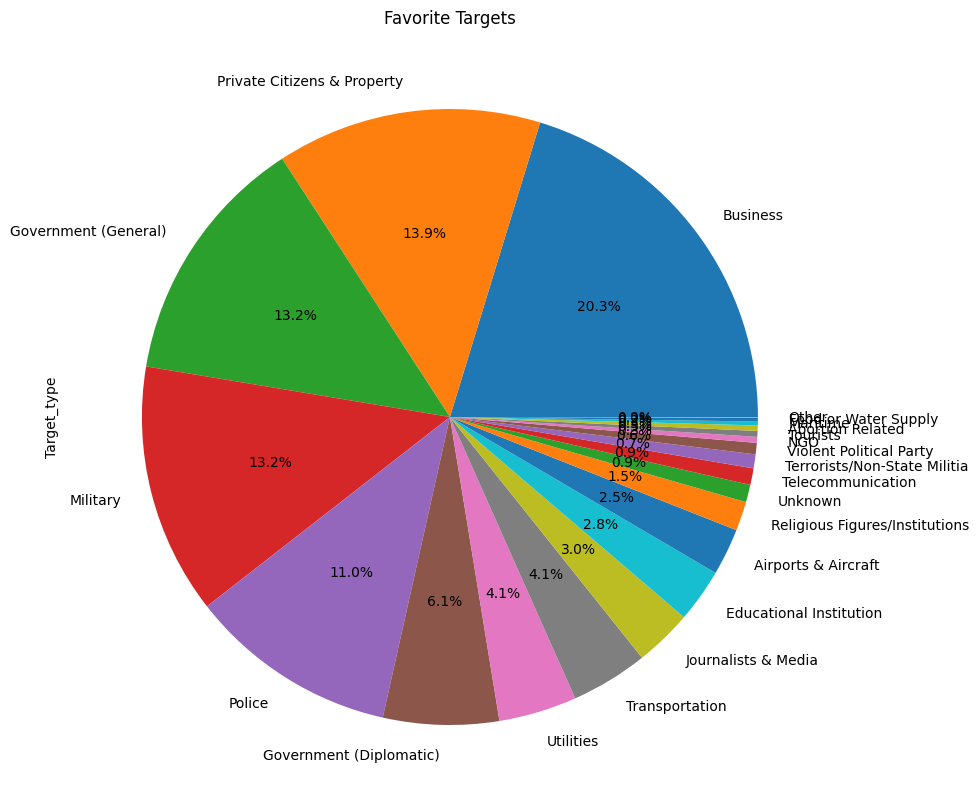

In [31]:
dataset['Target_type'].value_counts().plot(kind='pie',figsize=[12,10],autopct='%1.1f%%')
plt.title('Favorite Targets')

<Axes: ylabel='Weapon_type'>

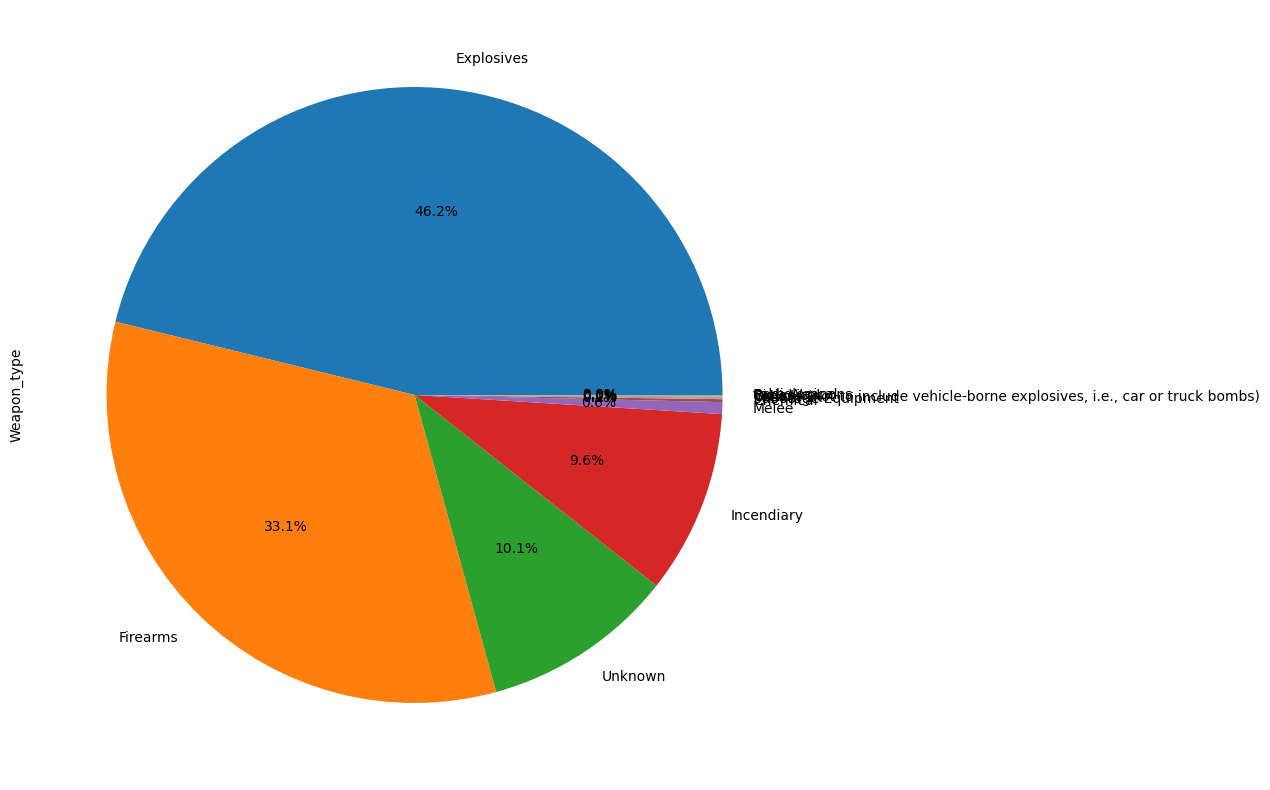

In [32]:
# Observation
# Bombing and Explosion method shows the highest chossen type.

# Count of Weapon Chssen for Attack.
from collections import Counter
values = list(dataset['AttackType'])
value_map = dict(Counter(values))
value_dataset = pd.DataFrame(value_map.items())
value_dataset.columns = ["AttackType","Count of Attack Type"]
px.bar(data_frame=value_dataset,x = 'AttackType',y = 'Count of Attack Type',color = 'AttackType',template="plotly_white")


dataset['Weapon_type'].value_counts().plot(kind='pie',figsize=[15,10],autopct='%1.1f%%')


### Region vs Weapon_type

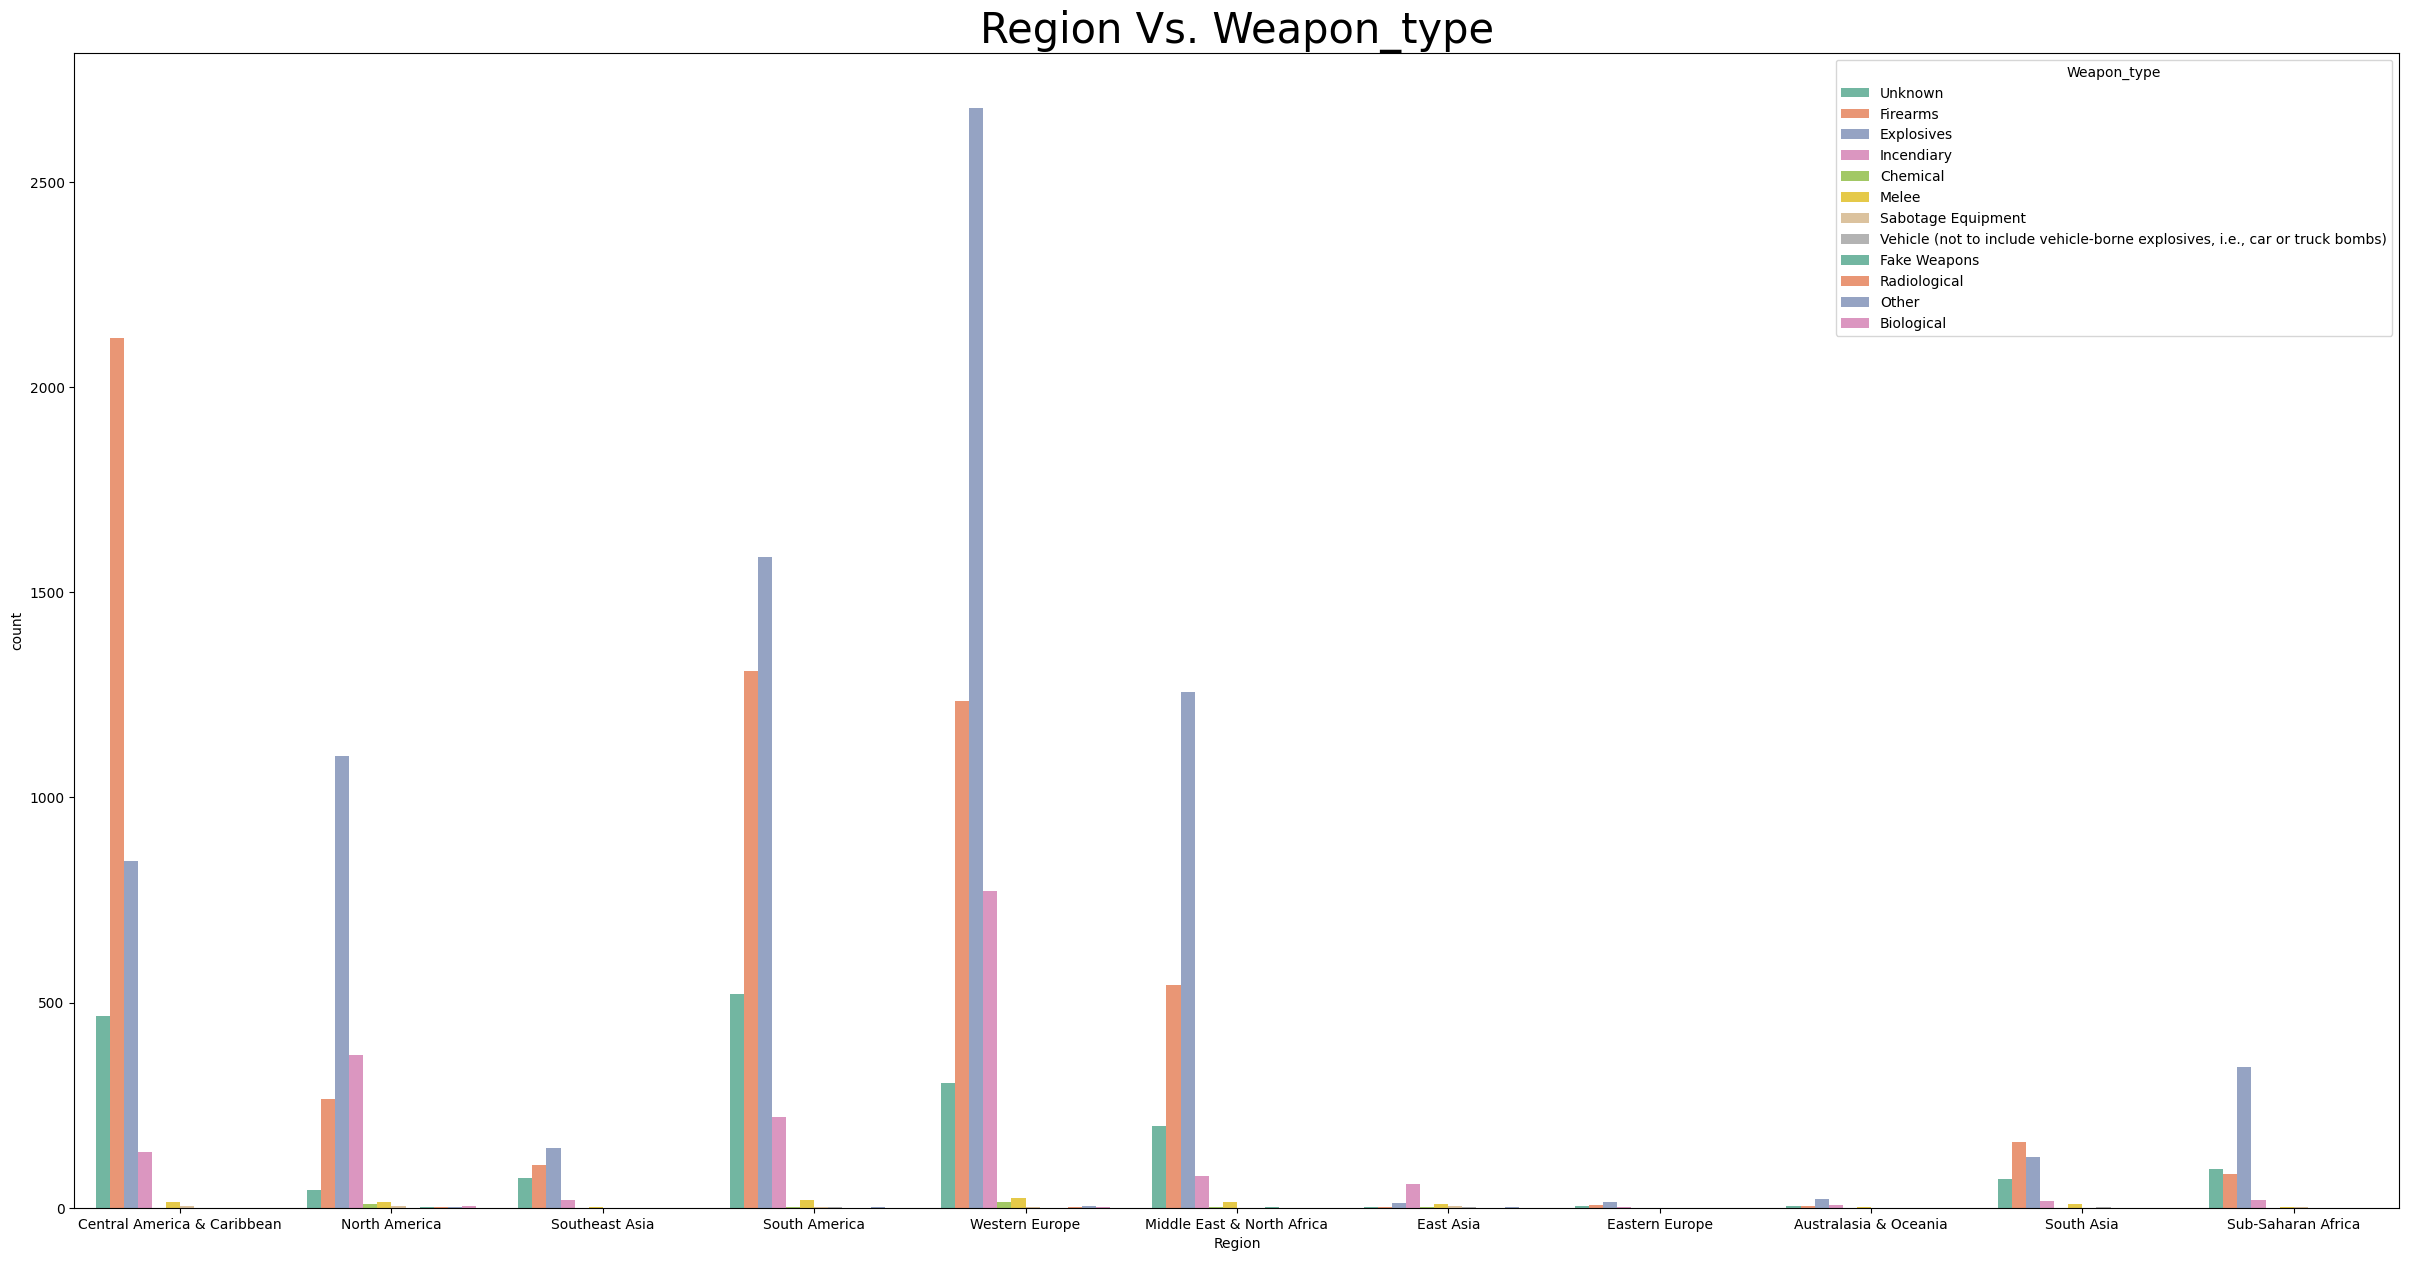

In [33]:
plt.subplots(figsize = (30,15))
sns.countplot(x="Region", hue ='Weapon_type', data = dataset,palette = "Set2")
plt.title('Region Vs. Weapon_type', fontsize = 30)
plt.show()

### Group Vs. Weapon_type

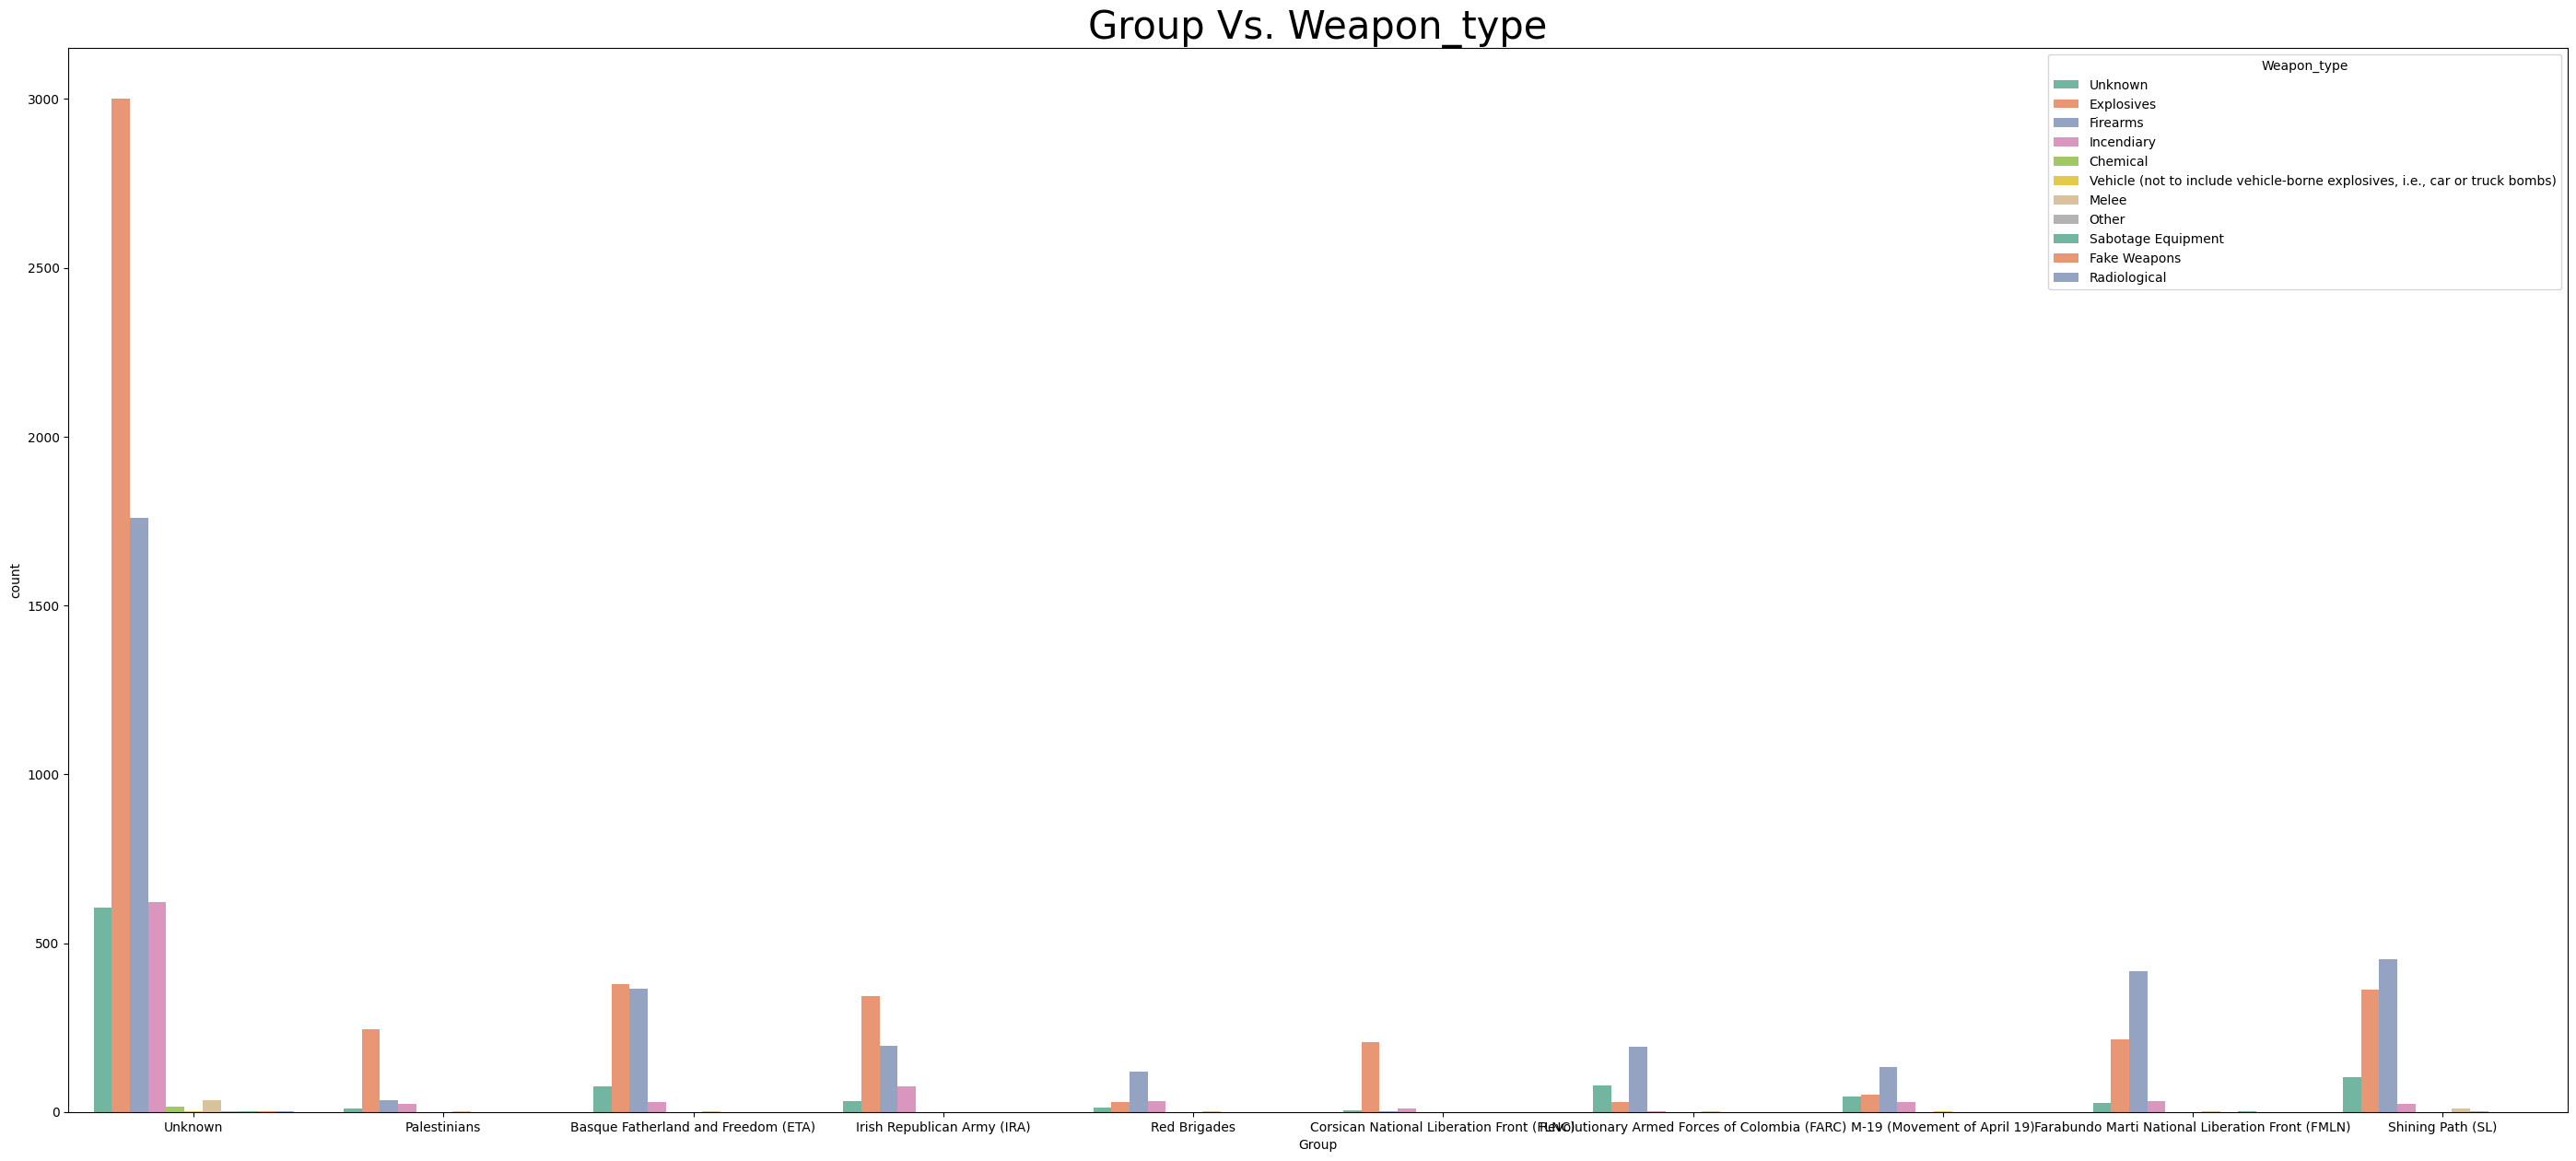

In [34]:
plt.subplots(figsize = (35,15))
Top_10_Group = dataset['Group'].value_counts().index.tolist()[0:10]
snap = dataset[['Group','Weapon_type']]
AttackG_Weapon = snap[snap['Group'].isin(Top_10_Group)]
sns.countplot(x='Group', hue ='Weapon_type', data = AttackG_Weapon,palette = "Set2")
plt.title('Group Vs. Weapon_type', fontsize = 30)
plt.show()

### Top 10 Groups Trend

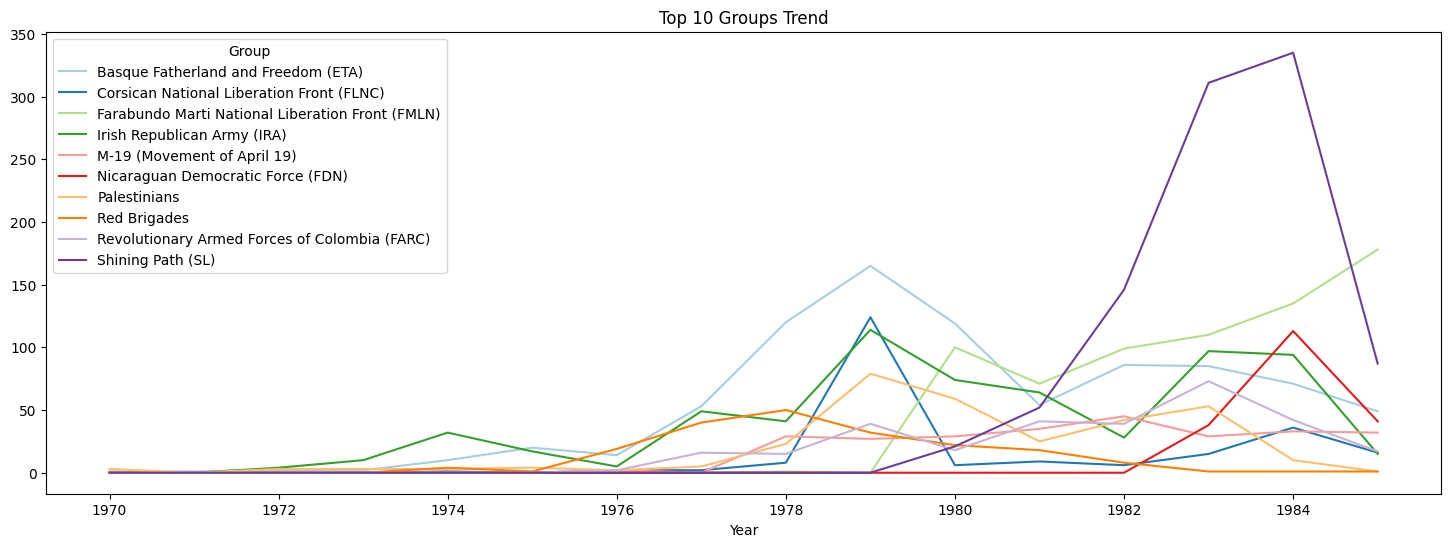

In [35]:
top_groups10=dataset[dataset['Group'].isin(dataset['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',15))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Top 10 Groups Trend")
plt.show()

In [36]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Plotting the HOT-ZONE of terrorism on the highest year of terrorist attack i.e. 2014

In [37]:
# Observation
# Again, Bombing and Explosion shows the highest.

# Plotting the HOT-ZONE of Terrorism on the highest year of Terrorist Attack i.e. 2014.
import folium
from folium.plugins import MarkerCluster
year=dataset[dataset['Year']==2014]
mapData=year.loc[:,'City':'longitude']
mapData=mapData.dropna().values.tolist()

map = folium.Map(location = [0, 50], tiles='CartoDB positron', zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(mapData)):
    folium.Marker(location=[mapData[point][1],mapData[point][2]],
                  popup = mapData[point][0]).add_to(markerCluster)
map

In [38]:
dataset.Country.value_counts()[:15]

El Salvador       1822
United States     1692
Spain             1387
Colombia          1224
Peru              1197
Italy             1134
Guatemala          993
France             810
United Kingdom     804
Lebanon            616
Chile              556
Nicaragua          551
Turkey             493
Argentina          345
Israel             330
Name: Country, dtype: int64

## Top Countries affected by Terror Attacks

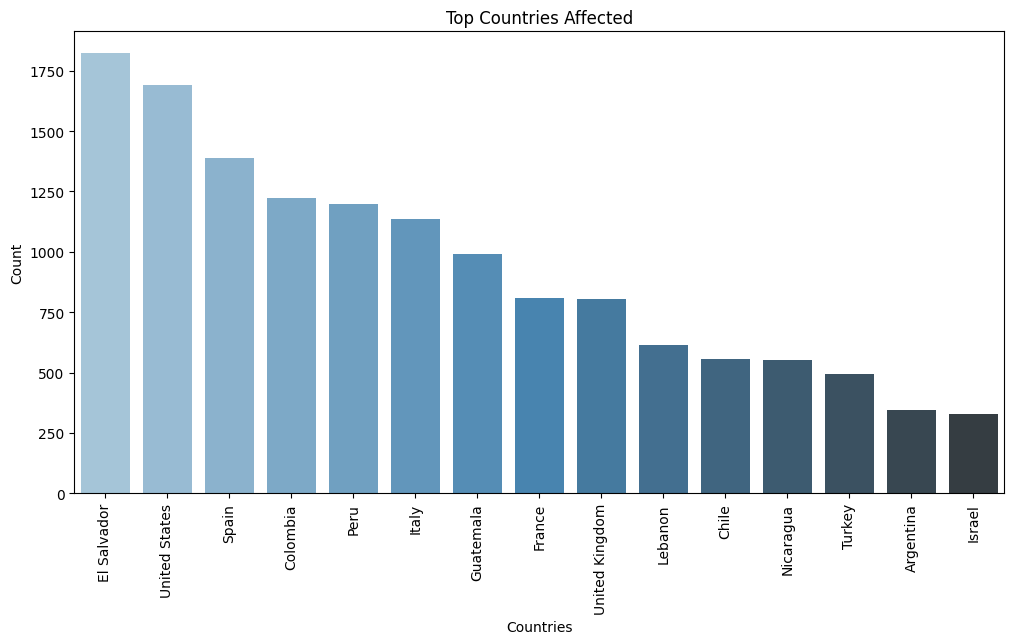

In [39]:
# Top Countries affected by Terror Attacks
plt.subplots(figsize=(12,6))
sns.barplot(x = dataset['Country'].value_counts()[:15].index , y = dataset['Country'].value_counts()[:15].values, palette='Blues_d',)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()



In [40]:
# Observation
# Iraq shows the highest Terror Attacks followed by other Middle-east region.

# Top 15 Countries showing the Highest Terror Attack.
plt.figure(figsize=(12,6))
country_attack=dataset.Country.value_counts()[:15].reset_index()
country_attack.columns= ["Country", "Total Attacks"]
px.bar(data_frame= country_attack,x = 'Country',y = 'Total Attacks',color = 'Country',template='plotly_white')

<Figure size 1200x600 with 0 Axes>

In [41]:
# Observation
# Iraq, again the highest followed by Pakistan, Afganistan and India.

# Counting the Total Number of Casualities in each Country.
plt.figure(figsize=(12, 6))
cas_count= dataset.groupby("Country").Casualities.sum().to_frame().reset_index().sort_values("Casualities", ascending=False)[:15]
px.bar(data_frame=cas_count,x = 'Country',y = 'Casualities',color='Country',template='plotly_white')

<Figure size 1200x600 with 0 Axes>

### Count of Terror Attack Region-Wise

In [42]:
# Count of Terror Attack Region-Wise.
region_attacks = dataset.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
fig = px.bar_polar(data_frame=region_attacks,r = 'Total Attacks',theta='Region',color = 'Region',
                  template="ggplot2", color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

## Observation
Middle East and North Africa shows the highest followed by South Asia.

## Conclusion
Hot zones of terrorism is Middle east and North Arica so,we should focus in these region.
Iraq, Afganistan and Pakistan most suffered country, Government should be aware from the citizens of these countries.
Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.
BOMBING and EXPLOSIVE are most used weapon and attack type b=used by terrorist Government should tighten borders and should strict arms law.
Most number of attacks were done by unknown group or not an group terrorist
All country should have to make pact to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.

## THANK YOU!!